# Homework 2. Numpy and matplotlib

***Double Click here to edit this cell***

- Name: 서다원 
- Student ID: 202001707
- Submission date: 2022.04.11

## Remark. If any kind of loops including for-loop, while-loops, list comprehension, and other loops are found, you get no points (0점). 

## Use numpy wherever it is possible. 


## Total: 45 pts

## Problem 1 (5 pts)

- The centroid of a finite set of $\displaystyle {k}$ points $\displaystyle \mathbf {x} _{1},\mathbf {x} _{2},\ldots ,\mathbf {x} _{k}$ in $\displaystyle \mathbb {R} ^{n}$ is
$$
\mathbf {C} ={\frac {\mathbf {x} _{1}+\mathbf {x} _{2}+\cdots +\mathbf {x} _{k}}{k}}
$$

- This point minimizes the sum of squared Euclidean distances between itself and each point in the set.
- Compute centroid
- Plot dataset and centroid 

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

def plot_centroid(data):
  data_array = np.array(data)
  x,y = data_array[:,0],data_array[:,1]
  plt.scatter(x, y)
  plt.scatter(np.mean(x),np.mean(y), c = 'r', marker = 's')
  plt.show()

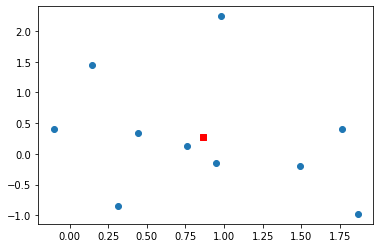

In [ ]:
# DO NOT EDIT THIS CELL
np.random.seed(0)
data = np.random.randn(10,2)
plot_centroid(data)

**You output must be:**

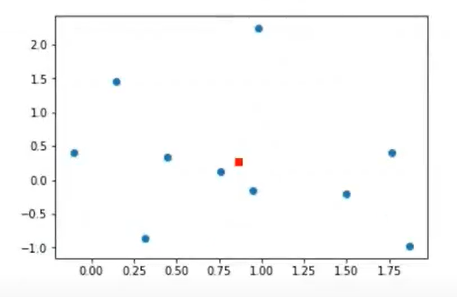

## Problem 2 (10 pts)

- Let $\textstyle x_{1},x_{2},\cdots ,x_{n}$ be a set of $\textstyle n$ points in a space with a distance function $d$. 
- Medoid is defined as
$$
x_{\text{medoid}} = \text{argmin}_{y \in \{x_1, x_2, \cdots, x_n\}} \sum_{i=1}^{n}d(y, x_i)
$$
- Compute medoid using Euclidean distance as a distance function.
- Plot dataset and medoid
- *Do not use sklearn, scipy or any module computing distance matrix directly*
- Use numpy functions only

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

def plot_medoid(data):
  data_array = np.array(data)
  x = data_array[:,0]
  y = data_array[:,1]

  u = data_array[:, :,np.newaxis]
  v = data_array.T[np.newaxis,:, :]
  
  dist = np.sqrt(np.sum((u - v)**2, axis=1))

  dist_sum = dist.sum(axis = 0) # axis = 0 방향(행방향)의 합 구하기
  medoid_index = np.argmin(dist_sum) # dist 가장 작은 값의 index, 이 예제에서는 6
  
  plt.scatter(x, y)
  plt.scatter(x[medoid_index], y[medoid_index], c = 'r', marker = 's')

  plt.show()

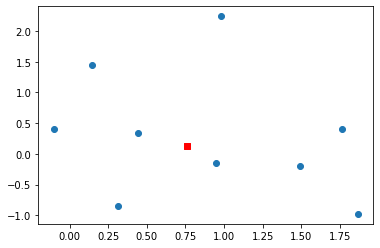

In [ ]:
# DO NOT EDIT THIS CELL
np.random.seed(0)
data = np.random.randn(10,2)
plot_medoid(data)

**You output must be:**

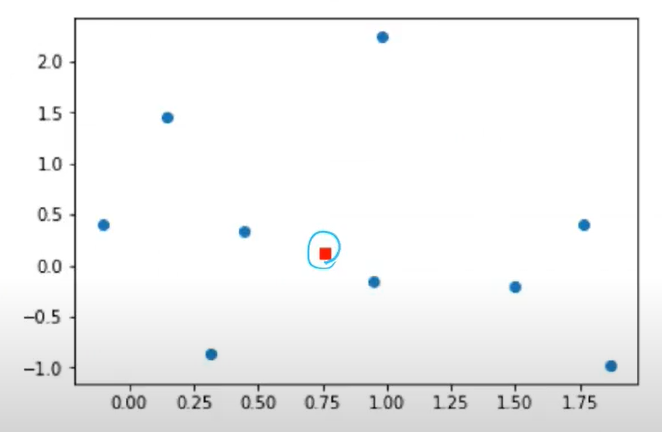

## Sample code

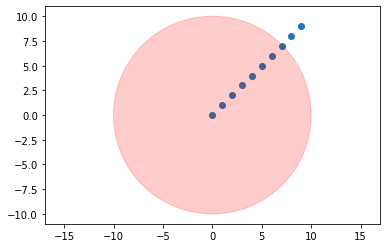

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

def sample_code():
    x = np.arange(10)
    y = np.arange(10)
    center = (0, 0)
    radius = 10
    plt.scatter(x, y)
    ax = plt.gca()
    ax.add_patch(plt.Circle(center, radius, color='r', alpha=0.2))
    plt.axis('equal')
    plt.show()
    
sample_code()

## Problem 3 (5 pts)

- We want to draw a scatter plot using **data**
- Plot the center using a green square symbol
- Plot points inside **radius** from center using red dots
- Plot points out of the **radius** from center using 'C0' colored dots
- Draw a filled circle centered at **center** using red color and alpha=0.2

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

def points_within_radius(data, center, radius):
  data_array = np.array(data)
  x = data_array[:, 0]
  y = data_array[:, 1]

  data_array = np.append(data_array, [center], axis=0)

  plt.scatter(x, y)

  u = data_array[:,:,np.newaxis]
  v = data_array.T[np.newaxis,:, :]

  dist = np.sqrt(np.sum((u - v)**2, axis=1))

  inside_index = np.argwhere(dist[:, 10] <= radius)
  plt.scatter(data_array[inside_index, 0], data_array[inside_index, 1], color='r')
  outside_index = np.argwhere(dist[:, 10] > radius)
  plt.scatter(data_array[outside_index,0], data_array[outside_index, 1], color='b')

  ax = plt.gca()
  ax.add_patch(plt.Circle(center, radius, color='r', alpha=0.2))
  plt.scatter(center[0],center[1], color = 'g', marker = 's')

  plt.axis('equal')
  plt.show()

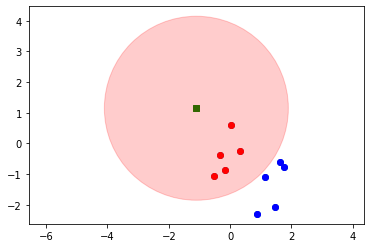

In [ ]:
# DO NOT EDIT THIS CELL
np.random.seed(1)
data = np.random.randn(10,2)
radius = 3.0
center = np.random.randn(2)
points_within_radius(data, center, radius)

**You output must be:**

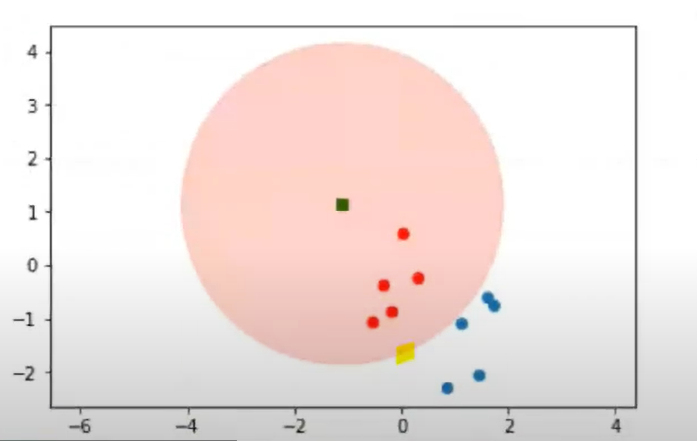

## Problem 4 (10 pts)

- We want to find k nearest points from the center
- Plot the center using a green square symbol
- Plot k-nearest points from center using red dots
- Plot other points using 'C0' colored dots
- Draw a filled circle centered at **center** using red color and alpha=0.2
- *Do not use sklearn, scipy or any module computing k-nearest points directly*
- Use numpy functions only

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

def points_k_nearest(data, center, k=1):
  dist = data - center #center와의 차를 구함
  dist = dist**2
  dist = dist.sum(axis=1)
  dist = np.sqrt(dist)
  sorted_arg = dist.argsort()

  dist_array = np.stack([dist[sorted_arg], sorted_arg],1)
  inside_array = np.where(dist[:] <= dist_array[k-1][0])[0]

  x,y = data[:, 0], data[:, 1]
  plt.scatter(x,y)
  ax = plt.gca()
  ax.add_patch(plt.Circle(center, dist_array[k-1][0], color='r', alpha=0.2))
  plt.scatter(data[inside_array][:,0], data[inside_array][:,1], color='red')
  plt.scatter(center[0],center[1], color = 'g', marker = 's') #원의 중심

  plt.axis('equal')
  plt.show()

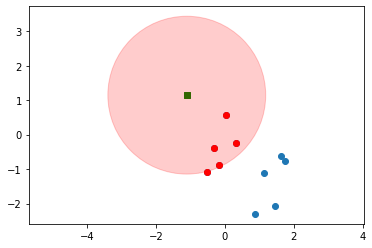

In [ ]:
# DO NOT EDIT THIS CELL
np.random.seed(1)
data = np.random.randn(10,2)
k = 5
center = np.random.randn(2)
points_k_nearest(data, center, k)

**You output must be:**

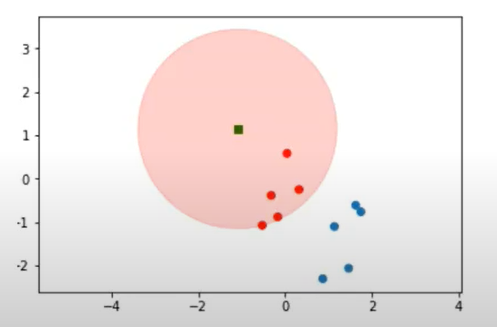

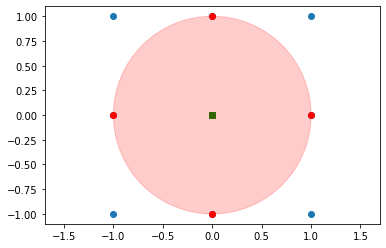

In [ ]:
# DO NOT EDIT THIS CELL
np.random.seed(1)
data = np.array([[1.,0.],[0.,1.],[-1.,0.],[0.,-1.],[1.,1.],[1.,-1.],[-1.,1.],[-1.,-1.]])
np.random.shuffle(data)
k = 1
center = np.array([0.,0.])
points_k_nearest(data, center, k)

**You output must be:**

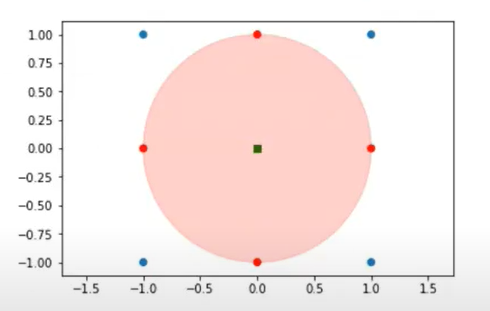

## Problem 5 (15 pts)

- **find_k_nearest_index** returns the index of the k-nearest
- We want to time the execution
- *Do not use sklearn, scipy or any module computing k-nearest points directly*
- Use numpy functions only
- Points: 
    - when mean time $\le$ 5s: 15 pts
    - when mean time $\gt$ 5s and $\le$ 10s: 10 pts
    - when mean time $\gt$ 10s: 5 pts

In [1]:
import numpy as np

def find_k_nearest_index(data, center, k=1):
    dist = data - center #center와의 차를 구함
    dist = dist**2
    dist = dist.sum(axis=1)
    sorted_arg = dist.argsort()
    dist_array = np.stack([dist[sorted_arg], sorted_arg],1)
    return np.where(dist[:] <= dist_array[k-1][0])[0]

In [2]:
# DO NOT EDIT THIS CELL

np.random.seed(0)
data = np.array([[1.,0.],[0.,1.],[-1.,0.],[0.,-1.],[1.,1.],[1.,-1.],[-1.,1.],[-1.,-1.]])
np.random.shuffle(data)
k = 1
center = np.array([0.,0.])
print(find_k_nearest_index(data, center, k))

[1 2 4 5]


**You output must be:**
```
[1 2 4 5]
```

In [3]:
# DO NOT EDIT THIS CELL

np.random.seed(100)
data = np.random.randn(10000000,20)   # 10 million data
k = 5
center = np.random.randn(20)
print(find_k_nearest_index(data, center, k))
%timeit find_k_nearest_index(data, center, k)

[1664998 3042821 3307688 3848441 5351099]
1 loop, best of 5: 3.31 s per loop


**You output must be:**
```
[1664998 3042821 3307688 3848441 5351099]
```
**Your time must be around:**
```
1.99 s ± 113 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
```

**If your computer is in poor spec, don't buy new one.**

**Use google colab! In google colab, I got 1.2s. Google colab outperforms my i5-16GB laptop.**
```
1 loop, best of 5: 1.2 s per loop
```

## Ethics:
If you cheat, you will get negatgive of the total points.
If the homework total is 22 and you cheat, you get -22.

## What to submit

- Run **all cells** after restarting the kernel
- Goto "File -> Print Preview"
- Print the page as pdf
- Pdf file name must be in a form of: homework_2_홍길동_202000001.pdf
- Submit the pdf file in google classroom
- No late homeworks will be accepted
- Your homework will be graded on the basis of correctness and programming skills